# CS 3400 Machine Learning - Lab 6: Cost Functions and Parameter Space

## Stuart Harley

### Introduction

In this lab we are experimenting with error and cost functions. We implement each for a gaussian model and a linear model. We then use grid searches in order to reduce the cost and find the best parameters in parameter sets for both the gaussian and linear models.

### Importing Libraries

In [1]:
from cost_functions import GaussianCostFunction, LinearCostFunction
from test_cost_functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Testing Implementation of Cost Functions

In [2]:
!python test_cost_functions.py

......
----------------------------------------------------------------------
Ran 6 tests in 0.014s

OK


### Experiment 1: Course Grid Search - Gaussian Distribution

Loading in the gaussian distribution dataset

In [3]:
gauss = np.loadtxt('gaussdist.csv', delimiter=',')

The first column in the dataset is the value (feature variable) and the second column contains the frequency of occurances of that value, out of a total of 1.0 (response variable).

In [4]:
gauss[0:5,:]

array([[6.99000000e+00, 1.56842355e-01],
       [8.90000000e+00, 7.89692304e-03],
       [9.58000000e+00, 1.55088416e-03],
       [5.46000000e+00, 3.18990459e-01],
       [1.38000000e+00, 1.39635489e-03]])

Storing the feature and response variables in separate arrays.

In [5]:
gauss_feat = gauss[:,0]
gauss_resp = gauss[:,1]

Instantiating the cost function class for GaussianCostFunction using the gaussian dataset.

In [6]:
gauss_cost = GaussianCostFunction(gauss_feat, gauss_resp)

Plotting the gaussian distribution dataset

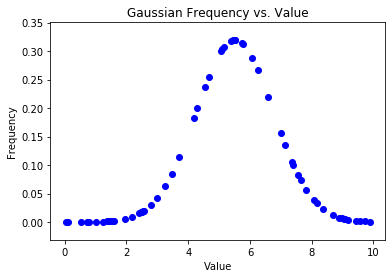

In [7]:
fig, axes = plt.subplots()
axes.scatter(gauss_feat, gauss_resp, color='b')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value');

Using the parameter set (mu=1, sigma=.75) to generate model predictions and plotting them.

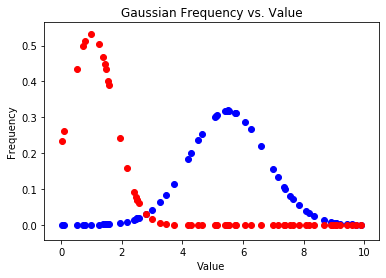

In [8]:
pred_y = gauss_cost.predict(gauss_feat, (1, .75))
fig, axes = plt.subplots()
axes.scatter(gauss_feat, gauss_resp, color='b')
axes.scatter(gauss_feat, pred_y, color='r')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value');

Using the cost method to solve for the error and adding it to the plot.

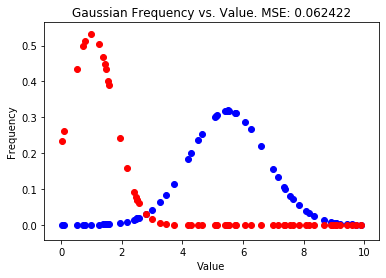

In [9]:
cost = gauss_cost.cost((1, .75))
fig, axes = plt.subplots()
axes.scatter(gauss_feat, gauss_resp, color='b')
axes.scatter(gauss_feat, pred_y, color='r')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value. MSE: ' + str(round(cost, 6)));

Creating 2 new parameter vectors, mu and sigma, of evenly spaced values in the "parameter space". For this experiment that is 0 to 10 and .5 to 2 respectively. Calculating the error of each combination.

In [10]:
mus = np.linspace(0, 10, 100)
sigmas = np.linspace(.5, 2, 50)
xv, yv = np.meshgrid(mus, sigmas)
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
errors = np.zeros(xv.size)
for i in range (errors.size):
    errors[i] = gauss_cost.cost(X[i])

Creating a heatmap plot of the errors

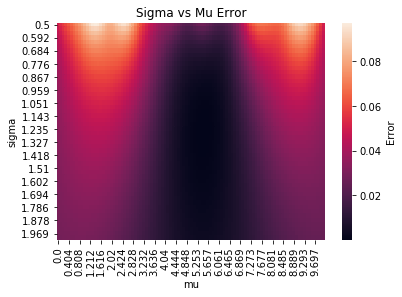

In [11]:
for i in range(mus.size):
    mus[i] = round(mus[i], 3)
for i in range(sigmas.size):
    sigmas[i] = round(sigmas[i], 3)
errors = errors.reshape(xv.shape)
df = pd.DataFrame(data=errors, columns=mus, index=sigmas)
ax = plt.axes()
sns.heatmap(df, ax=ax, cbar_kws={'label':'Error'})
plt.title('Sigma vs Mu Error')
plt.xlabel('mu')
plt.ylabel('sigma');

Picking a combination of parameters that produce a low error based on the heatmap.

In [12]:
cost = gauss_cost.cost((5, 1.25))
print('Error for mu=5, sigma=1.25: ' + str(cost))

Error for mu=5, sigma=1.25: 0.001310857288618482


Plotting these parameters against the given dataset.

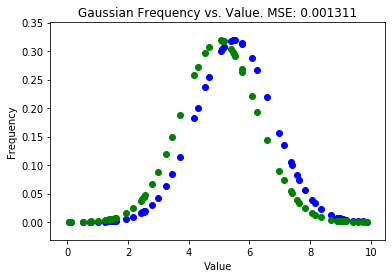

In [13]:
pred_y = gauss_cost.predict(gauss_feat, (5, 1.25))
fig, axes = plt.subplots()
axes.scatter(gauss_feat, gauss_resp, color='b')
axes.scatter(gauss_feat, pred_y, color='g')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value. MSE: ' + str(round(cost, 6)));

### Experiment 2: Refined Grid Search - Gaussian Distribution

Repeating the same steps as the course grid search, but using more refined parameter values. mu between 5 and 6. sigma between 1 and 1.75.

In [14]:
mus = np.linspace(5, 6, 100)
sigmas = np.linspace(1, 1.75, 50)
xv, yv = np.meshgrid(mus, sigmas)
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1)])
errors = np.zeros(xv.size)
for i in range (errors.size):
    errors[i] = gauss_cost.cost(X[i])

Creating a heatmap of the errors.

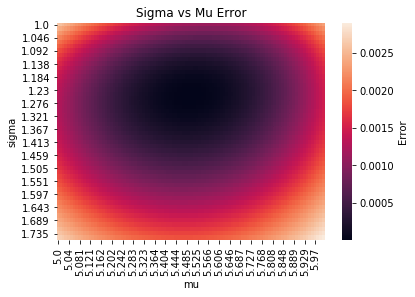

In [15]:
for i in range(mus.size):
    mus[i] = round(mus[i], 3)
for i in range(sigmas.size):
    sigmas[i] = round(sigmas[i], 3)
errors = errors.reshape(xv.shape)
df = pd.DataFrame(data=errors, columns=mus, index=sigmas)
ax = plt.axes()
sns.heatmap(df, ax=ax, cbar_kws={'label':'Error'})
plt.title('Sigma vs Mu Error')
plt.xlabel('mu')
plt.ylabel('sigma');

Picking a combination of parameters that produce a low error based on the heatmap.

In [16]:
cost = gauss_cost.cost((5.5, 1.23))
print('Error for mu=5.5, sigma=1.23: ' + str(cost))

Error for mu=5.5, sigma=1.23: 5.285270041415482e-06


Plotting these parameters against the given dataset.

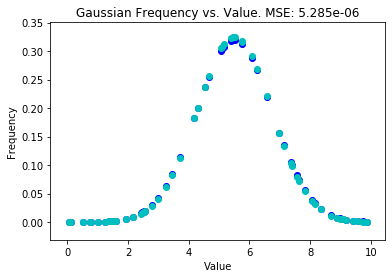

In [17]:
pred_y = gauss_cost.predict(gauss_feat, (5.5, 1.23))
fig, axes = plt.subplots()
axes.scatter(gauss_feat, gauss_resp, color='b')
axes.scatter(gauss_feat, pred_y, color='c')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value. MSE: ' + str(round(cost, 9)));

Using argmin to find the minimum error in the parameter space of mu between 5 and 6 and sigma between 1 and 1.75.

In [18]:
mus = np.linspace(5, 6, 100)
sigmas = np.linspace(1, 1.75, 50)
ind = np.unravel_index(np.argmin(errors), errors.shape)
params = np.asarray([sigmas[ind[0]], mus[ind[1]]])
print('Minimum error in parameter space: ' + str(errors[ind]))
print('The associated parameters are sigma: ' + str(params[0])\
     + '\n\t\t\t\tmu: ' + str(params[1]))

Minimum error in parameter space: 4.3307051270672713e-07
The associated parameters are sigma: 1.2448979591836735
				mu: 5.505050505050505


### Experiment 3: "Blind" Grid Search - Multivariate Linear Model

Loading in the advertising data set.

In [19]:
adv = np.loadtxt('advertising.csv', skiprows=1, delimiter=',')

The first column is just the index. The final column is the sales column which is the dependent variable. The middle columns are offset, tv, radio, and newspaper respectfully.

In [20]:
adv[0:5,:]

array([[  1. ,   1. , 230.1,  37.8,  69.2,  22.1],
       [  2. ,   1. ,  44.5,  39.3,  45.1,  10.4],
       [  3. ,   1. ,  17.2,  45.9,  69.3,   9.3],
       [  4. ,   1. , 151.5,  41.3,  58.5,  18.5],
       [  5. ,   1. , 180.8,  10.8,  58.4,  12.9]])

Storing the features and response variable columns in separate arrays.

In [21]:
adv_feat = adv[:,1:5]
sales = adv[:,5]

Instantiating the cost function class for LinearCostFunction using the advertising dataset.

In [22]:
adv_cost = LinearCostFunction(adv_feat, sales)

Plotting model prediction with parameters \[B0, B1, B2, B3\] as \[0.1, 0.1, 0.1, 0.1\] vs response. Also plotting the line of identity (begins at the origin and has a slope of 1).

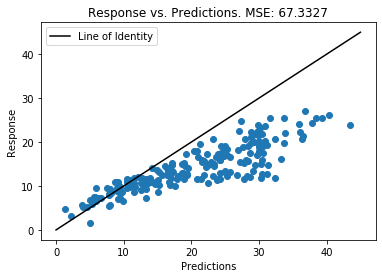

In [23]:
adv_pred = adv_cost.predict(adv_feat, np.asarray([.1, .1, .1, .1]))
adv_mse = adv_cost.cost(np.asarray([.1, .1, .1, .1]))
x = np.linspace(0, 45, 2)
fig, axes = plt.subplots()
axes.scatter(adv_pred, sales)
axes.plot(x, x, c='k', label='Line of Identity')
axes.set_title('Response vs. Predictions. MSE: ' + str(round(adv_mse, 4)))
axes.set_xlabel('Predictions')
axes.set_ylabel('Response')
plt.legend();

Performing a grid search over all 4 coefficients (B0, B1, B2, B3).

In [24]:
bs = np.linspace(-1, 1, 50)
xv, yv, zv, av = np.meshgrid(bs, bs, bs, bs)
X = np.hstack([xv.reshape(-1, 1), yv.reshape(-1, 1),\
               zv.reshape(-1, 1), av.reshape(-1, 1)])
errors = np.zeros(xv.size)
for i in range (errors.size):
    errors[i] = adv_cost.cost(X[i])

Finding the combination of model parameters that results in the lowest possible error.

In [25]:
errors = errors.reshape(xv.shape)
ind = np.unravel_index(np.argmin(errors), errors.shape)
params = np.asarray([bs[ind[1]], bs[ind[0]], bs[ind[2]], bs[ind[3]]])
print('Minimum error in parameter space: ' + str(errors[ind]))
print('The associated parameters are [B0, B1, B2, B3]:\n\t' + str(params))

Minimum error in parameter space: 4.795343148688009
The associated parameters are [B0, B1, B2, B3]:
	[0.14285714 0.06122449 0.18367347 0.02040816]


Plotting these model parameters predictions vs. the response.

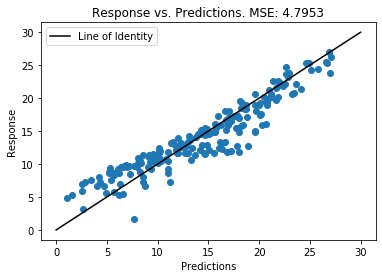

In [26]:
adv_pred = adv_cost.predict(adv_feat, params)
adv_mse = adv_cost.cost(params)
x = np.linspace(0, 30, 2)
fig, axes = plt.subplots()
axes.scatter(adv_pred, sales)
axes.plot(x, x, c='k', label='Line of Identity')
axes.set_title('Response vs. Predictions. MSE: ' + str(round(adv_mse, 4)))
axes.set_xlabel('Predictions')
axes.set_ylabel('Response')
plt.legend();

### Reflection Questions

a) By looking at the provided cost_functions.py, use 1-2 sentences to describe in detail the purpose of each of the methods. To guide this description,discuss the method input, method output, and what function each method serves for the cost function.

- The cost functions take in the parameters that you want to test. They then predict the value of the response variable for each row of your feature matrix to get predictions and then they calculate the mean squared error between those predictions and the actual reponses.

b) For the heatmaps that you generated for this lab, what do they describe? What do the “valleys” and “peaks” of this heat map represent?

- The heatmaps show the error associated with the parameter set of mu and sigma. The peaks are the parameters that resulted in the highest errors and the valleys are the parameters that resulted in the lowest errors.

c) For experiment 2, you increased the number of samples within the specified range.

a.Describe how the heatmap representation changed due to this increase in sampling.

b.What benefit did this higher sampling rate have for finding the set of parameters with the minimum error?

c.Was this sampling rate high enough? Defend your answer!

- We effectively took the best portion of the heatmap from part one and zoomed in on it with more detail in part two.

- This allowed us to find a more exact value, aka to more decimal places, for the best possible parameters. (Reduced the error).

- It depends what we are trying to do with our model whether these parameters are good enough or not. We can raise the sampling rate to continue to get better results, but if that is not neccesary for our model, then we don't need to do that.

d)The Gaussian distribution model is limited to two dimensions while the multivariate linear model implemented for this lab is 4 dimensional.

a.Describe a limitation of the grid search method as you add additional dimensions. Hint: Think about the time complexity required for the grid search as you add additional dimensions.

b.With time complexity in mind, can you derive a rule (mathematical expression) to estimate how many grid points are needed to evaluate all combination of parameters based on the number of dimensions.

c.With this rule, compare 2-dimensional models with 4-dimensional models. 10-dimensional? 100-dimensional?

- Every extra dimension you add to the grid search increases the search time exponentially.

- The formula would be n^d. n is the number of parameter points and d is the number of dimensions. This assumes that the number of points you are checking for each parameter is the same.

- 2D models would be n^2 time complexity, 4D is n^4 time complexity, 10D is n^10 time complexity, 100D is n^100 time complexity.

e)In experiment 3 you plotted the line of identity in the figure that compared the given response variable to the model prediction.

a.What does this line represent and how is it useful?

b.What does it mean for a value to lie above the line? Below the line?

c.How would predictions that perfectly replicate the given data appear in this plot?

- The line represents a mean squared error of 0. As a point gets further from the line its error goes up.

- If a value is above the line, the predicted value was less than the actual value. Below the line, the predicted value was greater than the actual value.

- Predictions that perfectly replicated the given data would all lie exactly on the line.

f) What are the weaknesses of grid search? Why wouldn't we want to use it?

They are computationally expensive because they grow exponentially per feature. The accuracy of your values depends on how many decimal places you go out to when testing values. (You can always get more accurate, but how accurate is enough?). Also, you need to know the region that would have the least error before you do a grid search. Otherwise you could miss it entirely depending on where you are searching.